# Datos de CICESE

Conjunto de datos obtenidos de:
* http://clicom-mex.cicese.mx/

In [51]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [52]:
#Variables de ubicacion de los archivos
mainpath = "~/Documents/GitHub/Estancia"
Evaporacion = "11009-CELAYA (SMN)-GTO-Evap.csv"
Calor = "11009-CELAYA (SMN)-GTO-Hunit.csv"
Precipitacion = "11009-CELAYA (SMN)-GTO-Precip.csv"
TempMax = "11009-CELAYA (SMN)-GTO-Tmax.csv"
TempMin = "11009-CELAYA (SMN)-GTO-Tmin.csv"
TempProm = "11009-CELAYA (SMN)-GTO-Tprom.csv"

#obtencion de DataSets de los archivos descargados
dataEvap = pd.read_csv(mainpath + "/" + Evaporacion,skiprows = 7)
dataCalor = pd.read_csv(mainpath + "/" + Calor,skiprows = 7)
dataPrecip = pd.read_csv(mainpath + "/" + Precipitacion,skiprows = 7)
dataTMax = pd.read_csv(mainpath + "/" + TempMax,skiprows = 7)
dataTMin = pd.read_csv(mainpath + "/" + TempMin,skiprows = 7)
dataTProm = pd.read_csv(mainpath + "/" + TempProm,skiprows = 7)

In [53]:
#Ver la dimension de los datos
dataEvap.shape

(34608, 4)

In [54]:
#verificar si contienen los mismos datos
len(dataEvap)==len(dataCalor)==len(dataPrecip)==len(dataTMax)==len(dataTMin)==len(dataTProm)


True

In [55]:
#renombrar una columna, se debio cambiar por el acento no coincidia con los otros DataSets
dataEvap = dataEvap.rename(columns={'Día':'Dia'})
dataCalor = dataCalor.rename(columns={'Día':'Dia'})
dataPrecip = dataPrecip.rename(columns={'Día':'Dia'})
dataTMax = dataTMax.rename(columns={'Día':'Dia'})
dataTMin = dataTMin.rename(columns={'Día':'Dia'})
dataTProm = dataTProm.rename(columns={'Día':'Dia'}) 
dataTProm.head()

,Mes,Dia,Anio,Datos
0,2,1,1922,19.50
1,2,2,1922,19.25
2,2,3,1922,18.50
3,2,4,1922,18.00
4,2,5,1922,19.50


In [56]:
#Juntar los DataSets de Evaporacion y Calor
datamain = pd.merge(left = dataEvap, right = dataCalor,
                    how = "inner",
                    left_on = ['Mes','Dia','Anio'],
                    right_on = ['Mes','Dia','Anio'])

In [57]:
datamain.head()

,Mes,Dia,Anio,Datos_x,Datos_y
0,2,1,1922,3.0,9.50
1,2,2,1922,2.9,9.25
2,2,3,1922,3.7,8.50
3,2,4,1922,3.1,8.00
4,2,5,1922,4.3,9.50


In [58]:
datamain = datamain.rename(columns={'Datos_x':'Evaporacion','Datos_y':'Calor'})

In [59]:
#Adicionamos los de Precipitacion
datamain = pd.merge(left = datamain, right = dataPrecip,
                    how = "inner",
                    on = ['Mes','Dia','Anio'])
datamain = datamain.rename(columns={'Datos':'Precipitacion'})
datamain.head()

,Mes,Dia,Anio,Evaporacion,Calor,Precipitacion
0,2,1,1922,3.0,9.50,0.0
1,2,2,1922,2.9,9.25,0.0
2,2,3,1922,3.7,8.50,0.0
3,2,4,1922,3.1,8.00,0.0
4,2,5,1922,4.3,9.50,0.0


In [60]:
#Adicionamos Temperatura Maxima
datamain = pd.merge(left = datamain, right = dataTMax,
                    how = "inner",
                    on = ['Mes','Dia','Anio'])
datamain = datamain.rename(columns={'Datos':'Temperatura Maxima'})
datamain.head()

,Mes,Dia,Anio,Evaporacion,Calor,Precipitacion,Temperatura Maxima
0,2,1,1922,3.0,9.50,0.0,25.0
1,2,2,1922,2.9,9.25,0.0,24.5
2,2,3,1922,3.7,8.50,0.0,24.0
3,2,4,1922,3.1,8.00,0.0,25.0
4,2,5,1922,4.3,9.50,0.0,25.0


In [61]:
#Adicionamos Temperatura Minima
datamain = pd.merge(left = datamain, right = dataTMin,
                    how = "inner",
                    on = ['Mes','Dia','Anio'])
datamain = datamain.rename(columns={'Datos':'Temperatura Minima'})
datamain.head()

,Mes,Dia,Anio,Evaporacion,Calor,Precipitacion,Temperatura Maxima,Temperatura Minima
0,2,1,1922,3.0,9.50,0.0,25.0,14.0
1,2,2,1922,2.9,9.25,0.0,24.5,14.0
2,2,3,1922,3.7,8.50,0.0,24.0,13.0
3,2,4,1922,3.1,8.00,0.0,25.0,11.0
4,2,5,1922,4.3,9.50,0.0,25.0,14.0


In [62]:
#Adicionamos Temperatura Promedio
datamain = pd.merge(left = datamain, right = dataTProm,
                    how = "inner",
                    on = ['Mes','Dia','Anio'])
datamain = datamain.rename(columns={'Datos':'Temperatura Promedio'})
datamain.head()

,Mes,Dia,Anio,Evaporacion,Calor,Precipitacion,Temperatura Maxima,Temperatura Minima,Temperatura Promedio
0,2,1,1922,3.0,9.50,0.0,25.0,14.0,19.50
1,2,2,1922,2.9,9.25,0.0,24.5,14.0,19.25
2,2,3,1922,3.7,8.50,0.0,24.0,13.0,18.50
3,2,4,1922,3.1,8.00,0.0,25.0,11.0,18.00
4,2,5,1922,4.3,9.50,0.0,25.0,14.0,19.50


In [92]:
datamain.describe()

,Mes,Dia,Anio,Evaporacion,Calor,Precipitacion,Temperatura Maxima,Temperatura Minima,Temperatura Promedio
count,34608.000000,34608.000000,34608.000000,17043.00000,33366.000000,33346.000000,33374.000000,33371.000000,33366.000000
mean,6.519186,15.729022,1968.961310,5.67820,9.771292,1.703356,27.917457,11.397899,19.657593
std,3.442997,8.800343,27.353243,2.02045,3.066121,5.954117,4.172621,4.188097,3.648144
min,1.000000,1.000000,1922.000000,0.03000,0.000000,0.000000,5.500000,-5.000000,3.000000
25%,4.000000,8.000000,1945.000000,4.20000,7.500000,0.000000,25.500000,8.500000,17.250000
50%,7.000000,16.000000,1969.000000,5.60000,10.000000,0.000000,28.000000,12.000000,20.000000
75%,10.000000,23.000000,1993.000000,7.00000,12.170000,0.000000,30.600000,15.000000,22.250000
max,12.000000,31.000000,2016.000000,17.00000,17.640000,99.500000,41.500000,23.000000,31.150000


In [65]:
#Correlacion de datos
datamain.corr()

,Mes,Dia,Anio,Evaporacion,Calor,Precipitacion,Temperatura Maxima,Temperatura Minima,Temperatura Promedio
Mes,1.000000,0.010520,-0.006825,-0.176181,0.008968,0.069855,-0.108771,0.138354,0.017269
Dia,0.010520,1.000000,-0.000006,0.003897,0.002865,-0.000372,-0.000625,0.003285,0.001346
Anio,-0.006825,-0.000006,1.000000,-0.007805,-0.052852,-0.001838,-0.058307,-0.064404,-0.070263
Evaporacion,-0.176181,0.003897,-0.007805,1.000000,0.456269,-0.005015,0.476830,0.300175,0.456366
Calor,0.008968,0.002865,-0.052852,0.456269,1.000000,0.110755,0.874011,0.856617,0.991471
Precipitacion,0.069855,-0.000372,-0.001838,-0.005015,0.110755,1.000000,-0.013746,0.200851,0.107453
Temperatura Maxima,-0.108771,-0.000625,-0.058307,0.476830,0.874011,-0.013746,1.000000,0.523352,0.872234
Temperatura Minima,0.138354,0.003285,-0.064404,0.300175,0.856617,0.200851,0.523352,1.000000,0.873246
Temperatura Promedio,0.017269,0.001346,-0.070263,0.456366,0.991471,0.107453,0.872234,0.873246,1.000000


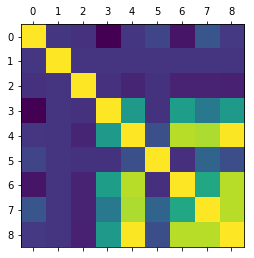

In [66]:
plt.matshow(datamain.corr())

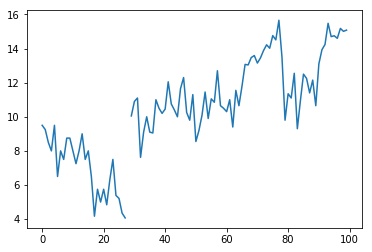

In [67]:
plt.plot( datamain['Calor'].head(100))

In [97]:
datamain = datamain.rename(columns={'Temperatura Maxima':'TempMax','Temperatura Minima':'TempMin', 'Temperatura Promedio':'TempProm'})
datamain.to_csv("CICESEDATA.csv")

In [83]:
feature_cols = ["Mes", "Dia", "Anio", "Evaporacion", "Calor", "Precipitacion"]
y_col = ['TempMax']

In [68]:
df1922to2015 = datamain[(datamain['Anio']>=1922) & (datamain['Anio'] <= 2015)]
df2016 = datamain[(datamain['Anio'] >= 2016)]

In [86]:
dXtrain, dYtrain = df1922to2015[feature_cols] ,  df1922to2015[y_col]
dXtest, dYtest = df2016[feature_cols] ,  df2016[y_col]

In [91]:
dYtest.tail()

,Temperatura Maxima
34603,25.0
34604,25.0
34605,27.0
34606,29.0
34607,30.0


In [94]:
X = datamain[feature_cols]
Y = datamain["Temperatura Maxima"]

In [95]:
lm = LinearRegression()
lm.fit(X,Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#verificar si hay valores nulos
np.any(np.isnan(datamain))

In [ ]:
#rellenar valores nulos 
datamain = datamain.fillna(0)
#verificar si hay valores infinitos
np.all(np.isfinite(datamain))

In [ ]:
np.nan_to_num(datamain)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

In [ ]:
list(zip(feature_cols, lm.coef_))

In [ ]:
lm.score(X,Y)

El modelo puede ser escito como: 
Calor = 0.2968700244423452 + 'Mes' * -0.09588677741001513 + 'Dia' * 0.00022332938888175 + 'Anio' * 0.005991859738244634 + 'Calor' * 1.6411822654355845 + 'Precipitacion' * -0.07923316111379947

In [ ]:
datamain['Predic_TM'] = 0.2968700244423452 + datamain['Mes'] * -0.09588677741001513 + datamain['Dia'] * 0.00022332938888175 + datamain['Anio'] * 0.005991859738244634 + datamain['Calor'] * 1.6411822654355845 + datamain['Precipitacion'] * -0.07923316111379947
datamain.head()

In [ ]:
SSD = np.sum((datamain["Predic_TM"]-datamain["Temperatura Maxima"])**2)
SSD

In [ ]:
RSE = np.sqrt(SSD/(len(datamain)-len(feature_cols)-1))
RSE

In [ ]:
TM_Prom = np.mean(datamain["Temperatura Maxima"])
TM_Prom

In [ ]:
error = RSE/TM_Prom
error * 100

In [ ]:
datamain['Predic_TM2'] = lm.predict(pd.DataFrame(datamain[feature_cols]))
datamain.head()

In [ ]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, datamain['Predic_TM'], color="blue")

In [ ]:
%matplotlib inline
figure, axs = plt.subplots(2,4, sharey=True, sharex=True)
datamain.plot(kind="scatter", x="Anio", y="Evaporacion", ax=axs[0][0])
datamain.plot(kind="scatter", x="Anio", y="Calor", ax=axs[0][1])
datamain.plot(kind="scatter", x="Anio", y="Precipitacion", ax=axs[0][2])
datamain.plot(kind="scatter", x="Anio", y="Temperatura Maxima", ax=axs[0][3])
datamain.plot(kind="scatter", x="Anio", y="Predic_TM",ax=axs[1][0])
datamain.plot(kind="scatter", x="Anio", y="Predic_TM2", ax=axs[1][1])

In [93]:
plt.plot(datamain['Anio'],datamain[''],"ro")

KeyError: ''